### Install Procsim

In [89]:
!pip install procsimulator==0.1.0

### Import Modules

In [2]:
import procsimulator
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator
from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.DataFromTomorrow import DataFromTomorrow
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.Evaluation import Evaluation

### Get current path

In [4]:
current_path = os.getcwd()
print(current_path)

C:\Users\Nuno.Velosa.CORP\OneDrive - Unipartner IT Services, S.A\Desktop\pyomo_experiments\first_paper


### Generation of the consumption profiles

In [7]:
path_steps_seconds = os.path.join(current_path, "..")
path_steps_minutes = "../output/minute"
num_days = "7"

In [8]:
cg = ConsumptionGenerator("../data.json", path_steps_seconds, path_steps_minutes)
#cg.execute(num_days, "houses")

### Generation of PV and Wind Production

In [9]:
pv_dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
#wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?startTime=now&endTime=nowPlus8d&location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
reg = RenewableEnergyGenerator(cg, pv_dat, wind_dat, cg.path_steps_minutes)

#reg.execute(num_days)

### Calculation of netload and Generation of the EC dataset

In [10]:
cmg = CommunityGenerator(cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

### Calculate metrics in the EC dataset

In [12]:
df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
evaluation = Evaluation(df, 0)

print("Average Power Used from Grid: " + "{:.2f}".format(evaluation.get_average_power_used_from_grid()) + " kW")
print("Average Power Used from PV: " + "{:.2f}".format(evaluation.get_average_power_used_from_pv()) + " kW")
print("Average Power Not Used from PV: " + "{:.2f}".format(evaluation.get_average_power_not_used_from_pv()) + " kW")
print("Energy Used from Grid: " + "{:.2f}".format(evaluation.get_energy_used_from_grid()) + " kWh")
print("Energy Used from PV: " + "{:.2f}".format(evaluation.get_energy_used_from_pv()) + " kWh")
print("Energy Not Used from PV: " + "{:.2f}".format(evaluation.get_energy_not_used_from_pv()) + " kWh")
print("Peaks Number: " + str(evaluation.get_peaks_number()))
print("Self Sufficiency (SS): " + "{:.2f}".format(evaluation.get_self_sufficiency()*100) + "%")
print("Self Consumption (SC): " + "{:.2f}".format(evaluation.get_self_consumption()*100) + "%")

Average Power Used from Grid: 1.72 kW
Average Power Used from PV: 1.48 kW
Average Power Not Used from PV: 4.09 kW
Energy Used from Grid: 41.29 kWh
Energy Used from PV: 35.47 kWh
Energy Not Used from PV: 98.28 kWh
Peaks Number: 5046
Self Sufficiency (SS): 46.21%
Self Consumption (SC): 26.52%


### Calculation of Community PPC

In [9]:
# Getting the community contracted power
community = cg.get_community()
print("Contracted Power: " + str(cg.calculate_contracted_power(community)))

Calculating the contracted power of the community
Contracted Power: 29900.0


### Community activities

In [10]:
cg.get_timeslots(community, True)

Creating the Timeslots of the community


[{'Start': '2022-11-27 09:57:00',
  'End': '2022-11-27 10:09:00',
  'Duration': '12',
  'max_power': 1137.3916666666669,
  'Power': 456.0516666666666,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-27 15:43:00',
  'End': '2022-11-27 15:55:00',
  'Duration': '12',
  'max_power': 1137.0783333333336,
  'Power': 532.0083333333333,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-28 09:43:00',
  'End': '2022-11-28 09:55:00',
  'Duration': '12',
  'max_power': 1135.78,
  'Power': 816.7,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-28 11:33:00',
  'End': '2022-11-28 11:45:00',
  'Duration': '12',
  'max_power': 1134.55,
  'Power': 1044.2733333333333,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-29 09:57:00',
  'End': '2022-11-29 10:09:00',
  'Duration': '12',
  'max_power': 1135.19,
  'Power': 930.5083333333332,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-29 16:02:00',
  'End': '2022-11-29

### Get the community netload

In [22]:
community_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
community_df.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
community_df['Date'] = pd.to_datetime(community_df['Date'])
community_df

,Date,Demand,PV_Production,Wind_Production,Production,Netload
0,2022-11-27 00:00:00,1051.223333,0.0,2755.725373,2755.725373,-1704.502040
1,2022-11-27 00:01:00,1120.191667,0.0,2777.570346,2777.570346,-1657.378679
2,2022-11-27 00:02:00,1200.915000,0.0,2798.620373,2798.620373,-1597.705373
3,2022-11-27 00:03:00,1191.496667,0.0,2818.885116,2818.885116,-1627.388449
4,2022-11-27 00:04:00,1178.795000,0.0,2838.374237,2838.374237,-1659.579237
...,...,...,...,...,...,...
10074,2022-12-03 23:54:00,952.108333,0.0,12974.960347,12974.960347,-12022.852014
10075,2022-12-03 23:55:00,950.246667,0.0,12984.506887,12984.506887,-12034.260220
10076,2022-12-03 23:56:00,940.765000,0.0,12994.053421,12994.053421,-12053.288421
10077,2022-12-03 23:57:00,921.718333,0.0,13003.599950,13003.599950,-12081.881616


### Plot Consumption

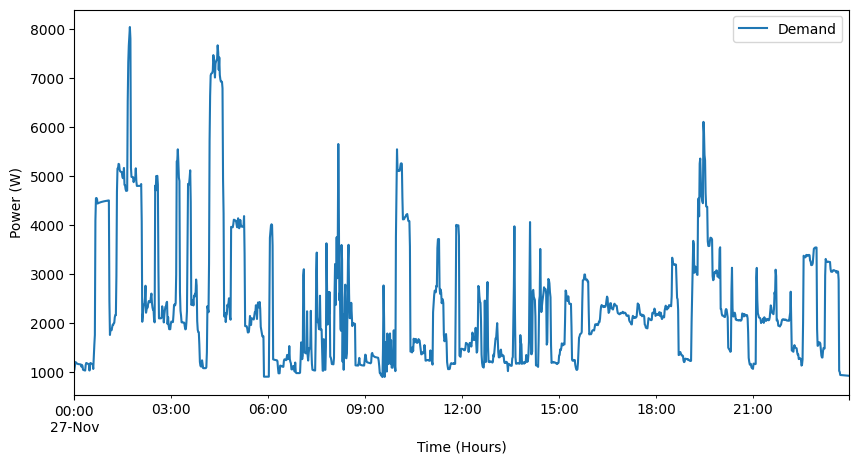

In [23]:
community_df = community_df.set_index("Date")
community_df[:24*60*1]["Demand"].plot(legend=True, label='Demand')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Consumption and Production

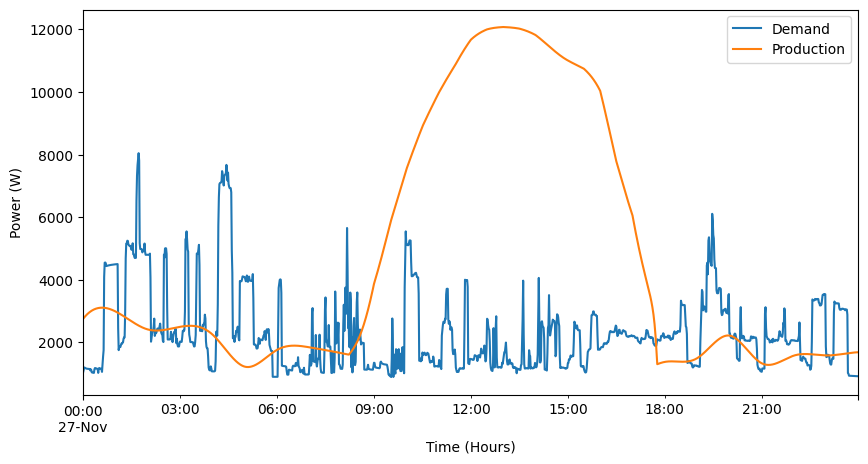

In [25]:
community_df[:24*60*1]["Demand"].plot(legend=True, label='Demand')
community_df[:24*60*1]["Production"].plot(legend=True, label='Production')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Flexible Consumption

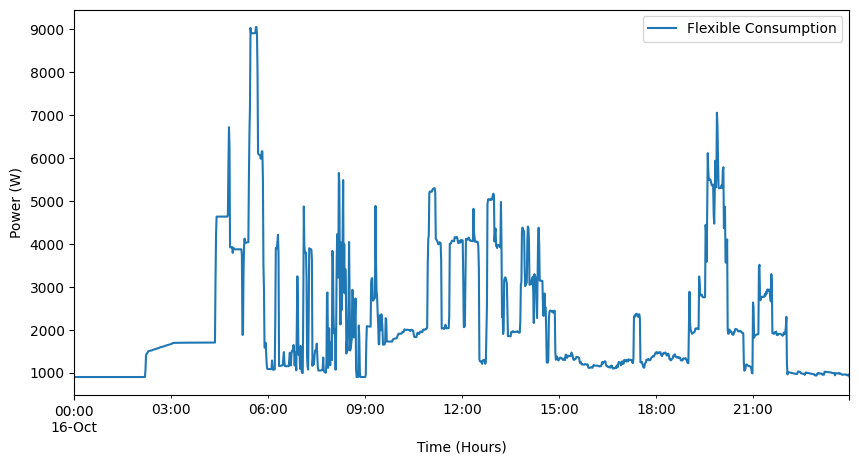

In [109]:
flexible_df = pd.read_csv(path_steps_minutes + '/community_not_baseload.csv', sep=';')
flexible_df.columns = ['Date', 'Power']
flexible_df['Date'] = pd.to_datetime(flexible_df['Date'])

flexible_df = flexible_df.set_index("Date")
flexible_df[:24*60]["Power"].plot(legend=True, label='Flexible Consumption')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

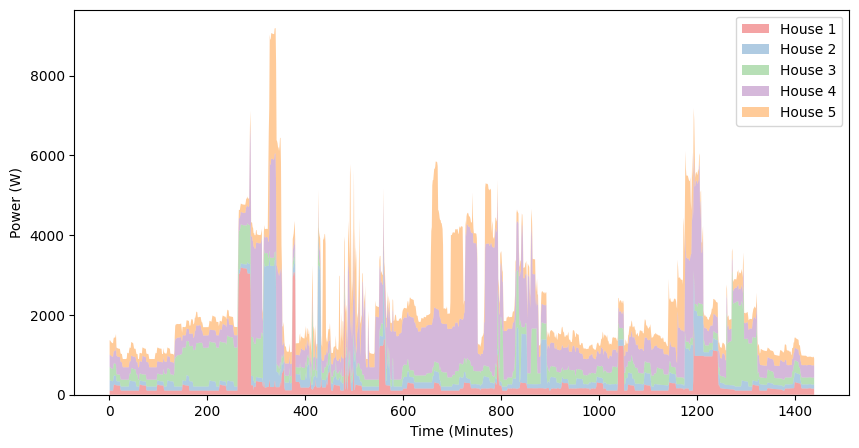

In [110]:
import seaborn as sns

houses_df = []
x = range(1,24*60+1)

for house_num in range(5):
    df = pd.read_csv(path_steps_minutes + '/house' + str(house_num) + '/total.csv', sep=';')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    houses_df.append(df["Power"][:24*60])
 
# use a known color palette
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.color_palette("Set1")
plt.stackplot(x,houses_df, labels=['House 1', 'House 2', 'House 3', 'House 4', 'House 5'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot Unflexible Consumption

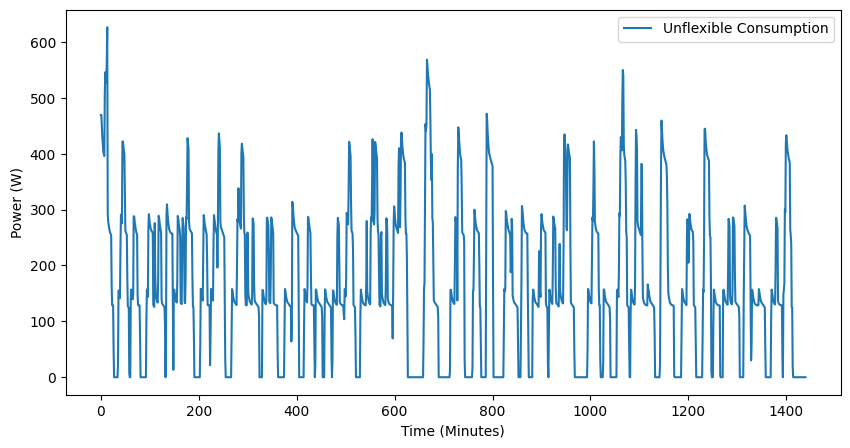

In [111]:
unflexible_df = pd.read_csv(path_steps_minutes + '/community_baseload.csv', sep=';')
unflexible_df.columns = ['Date', 'Power']
unflexible_df['Date'] = pd.to_datetime(unflexible_df['Date'])

unflexible_df[:24*60]["Power"].plot(legend=True, label='Unflexible Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot PV Production

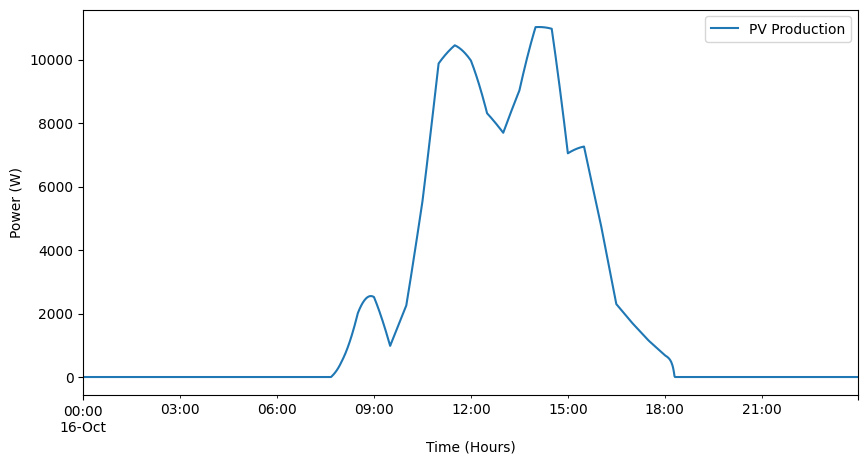

In [112]:
community_df[:24*60]["PV_Production"].plot(legend=True, label='PV Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Wind Production

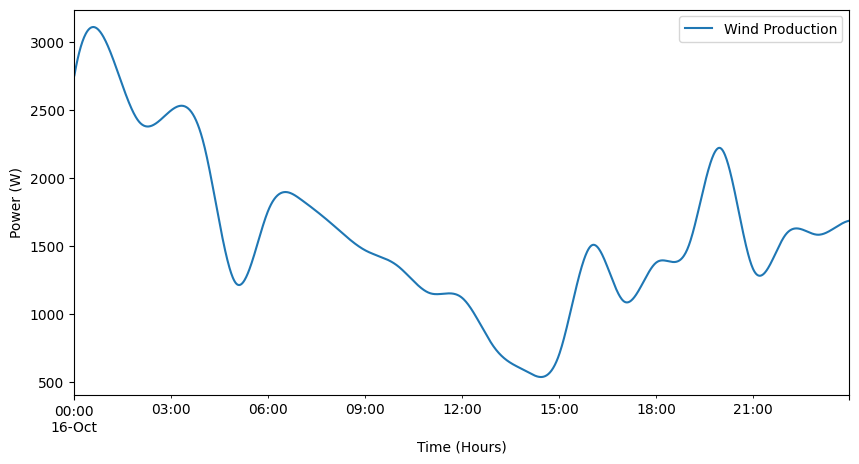

In [113]:
community_df[:24*60]["Wind_Production"].plot(legend=True, label='Wind Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Total Production

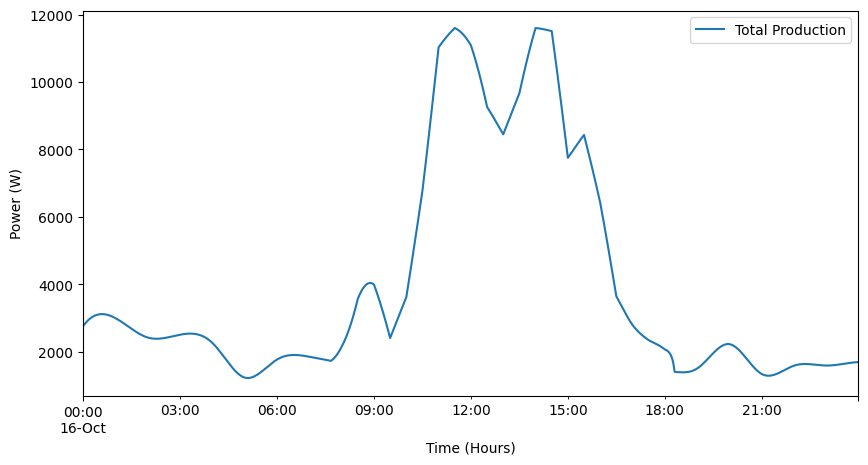

In [114]:
community_df[:24*60]["Production"].plot(legend=True, label='Total Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

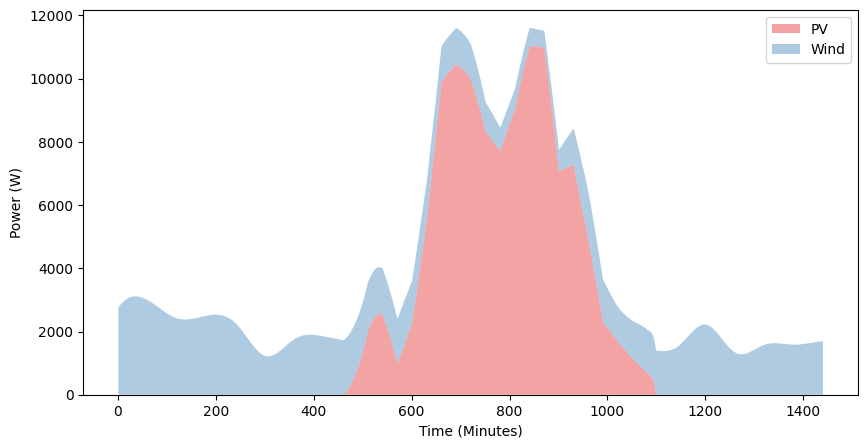

In [115]:
x = range(1,24*60+1)
 
pal = sns.color_palette("Set1")
plt.stackplot(x, [community_df[:24*60]["PV_Production"], community_df[:24*60]["Wind_Production"]], labels=['PV', 'Wind'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot Community Netload

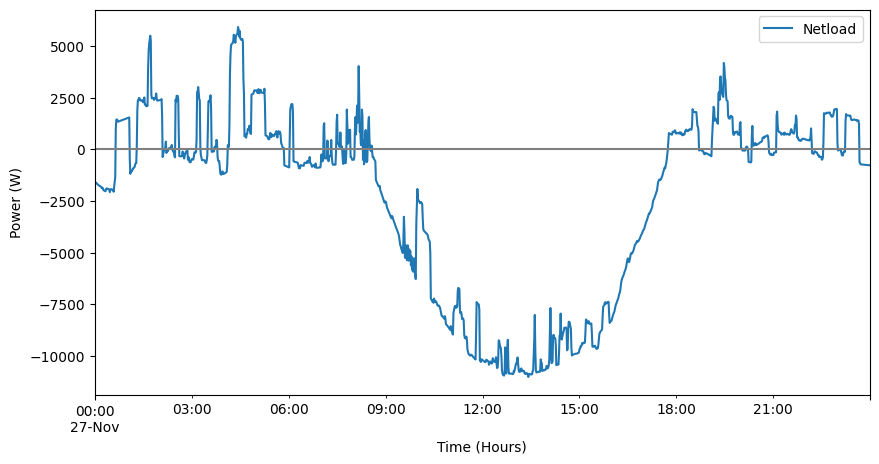

In [26]:
community_df[:24*60]["Netload"].plot(legend=True, label='Netload')
plt.axhline(y = 0, color = 'gray', linestyle = '-')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of House 3

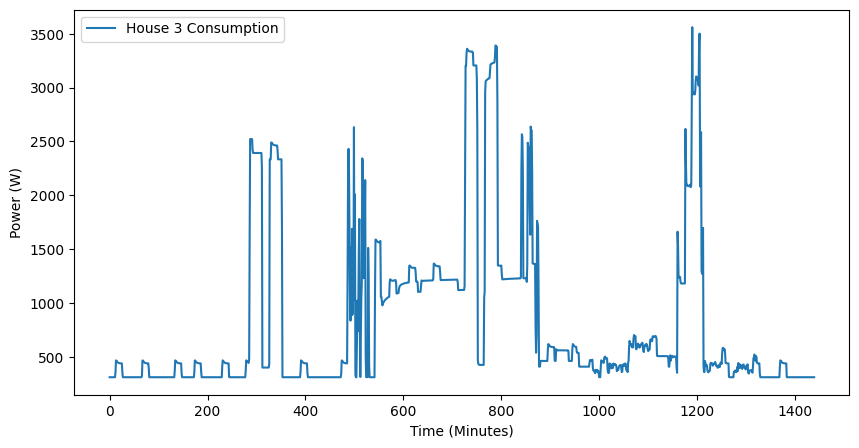

In [117]:
house3_total_df = pd.read_csv(path_steps_minutes + '/house3/total.csv', sep=';')
house3_total_df.columns = ['Date', 'Power']
house3_total_df['Date'] = pd.to_datetime(house3_total_df['Date'])

house3_total_df[:24*60]["Power"].plot(legend=True, label='House 3 Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of DW of House 4

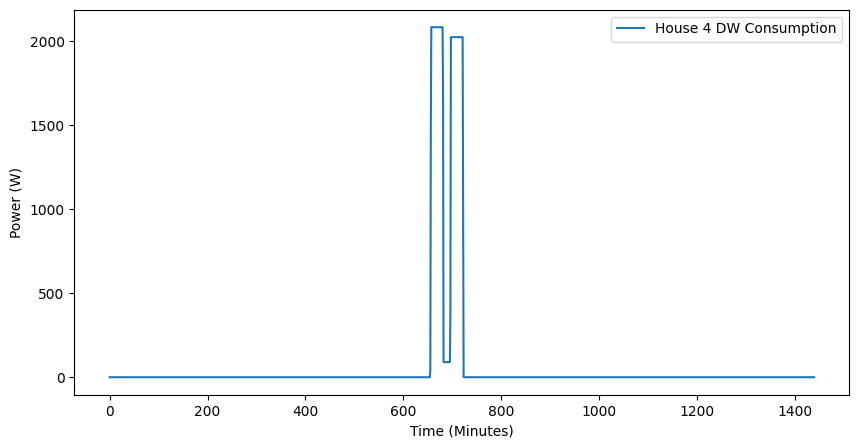

In [118]:
house4_wm_df = pd.read_csv(path_steps_minutes + '/house4/DISHWASHER.csv', sep=';')
house4_wm_df.columns = ['Date', 'Power']
house4_wm_df['Date'] = pd.to_datetime(house4_wm_df['Date'])

house4_wm_df[:24*60]["Power"].plot(legend=True, label='House 4 DW Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of Refrigerator of House 2

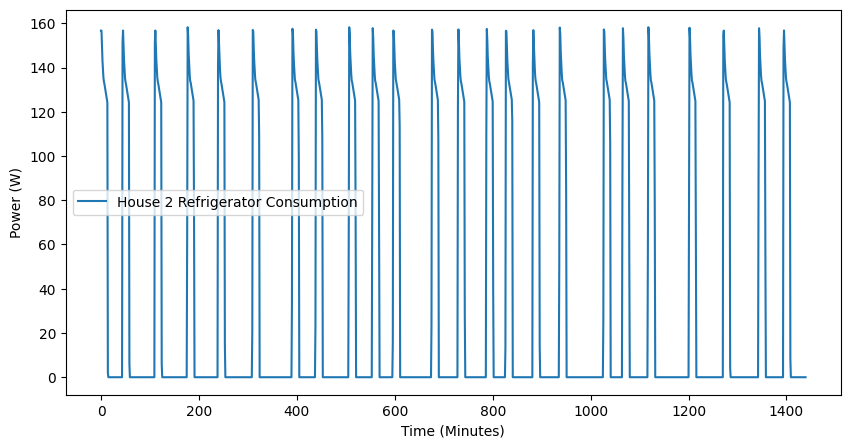

In [119]:
house2_refrigerator_df = pd.read_csv(path_steps_minutes + '/house2/REFRIGERATOR.csv', sep=';')
house2_refrigerator_df.columns = ['Date', 'Power']
house2_refrigerator_df['Date'] = pd.to_datetime(house2_refrigerator_df['Date'])

house2_refrigerator_df[:24*60]["Power"].plot(legend=True, label='House 2 Refrigerator Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of Cooking Dinner activity of House 1

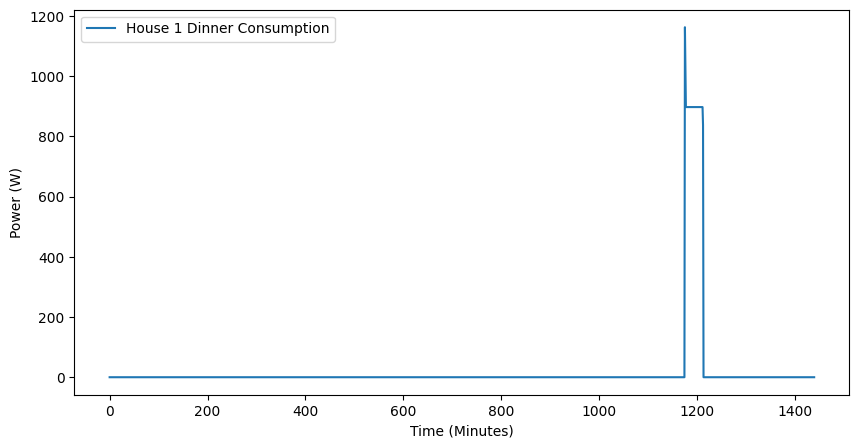

In [120]:
house1_dinner_df = pd.read_csv(path_steps_minutes + '/house1/cooking_a_dinner.csv', sep=';')
house1_dinner_df.columns = ['Date', 'Power']
house1_dinner_df['Date'] = pd.to_datetime(house1_dinner_df['Date'])

house1_dinner_df[:24*60]["Power"].plot(legend=True, label='House 1 Dinner Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of user Ann of House 2

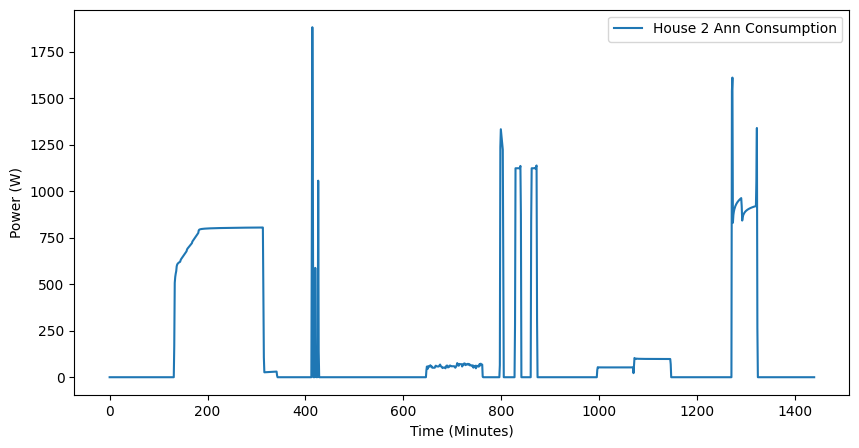

In [121]:
house2_ann_df = pd.read_csv(path_steps_minutes + '/house2/Ann.csv', sep=';')
house2_ann_df.columns = ['Date', 'Power']
house2_ann_df['Date'] = pd.to_datetime(house2_ann_df['Date'])

house2_ann_df[:24*60]["Power"].plot(legend=True, label='House 2 Ann Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of user Bill of House 2

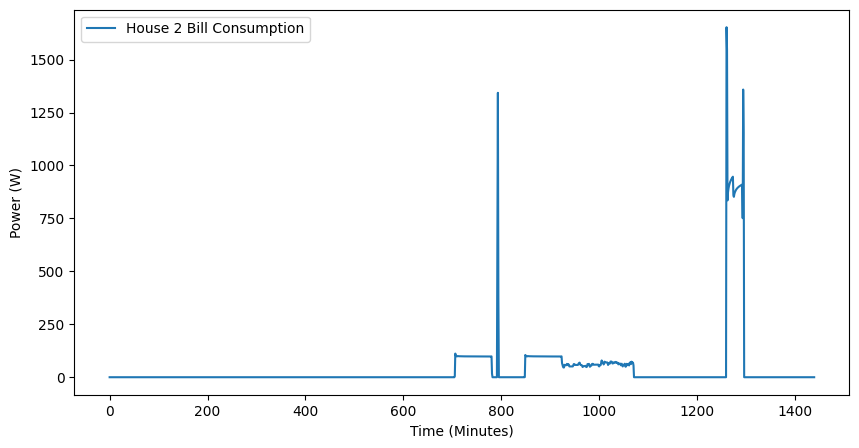

In [122]:
house2_bill_df = pd.read_csv(path_steps_minutes + '/house2/Bill.csv', sep=';')
house2_bill_df.columns = ['Date', 'Power']
house2_bill_df['Date'] = pd.to_datetime(house2_bill_df['Date'])

house2_bill_df[:24*60]["Power"].plot(legend=True, label='House 2 Bill Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

In [21]:
df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
evaluation = Evaluation(df, 0)

print("Average Power Used from Grid: " + "{:.2f}".format(evaluation.get_average_power_used_from_grid()) + " kW")
print("Average Power Used from PV: " + "{:.2f}".format(evaluation.get_average_power_used_from_pv()) + " kW")
print("Average Power Not Used from PV: " + "{:.2f}".format(evaluation.get_average_power_not_used_from_pv()) + " kW")
print("Energy Used from Grid: " + "{:.2f}".format(evaluation.get_energy_used_from_grid()) + " kWh")
print("Energy Used from PV: " + "{:.2f}".format(evaluation.get_energy_used_from_pv()) + " kWh")
print("Energy Not Used from PV: " + "{:.2f}".format(evaluation.get_energy_not_used_from_pv()) + " kWh")
print("Peaks Number: " + str(evaluation.get_peaks_number()))
print("Self Sufficiency (SS): " + "{:.2f}".format(evaluation.get_self_sufficiency()*100) + "%")
print("Self Consumption (SC): " + "{:.2f}".format(evaluation.get_self_consumption()*100) + "%")

Average Power Used from Grid: 1.72 kW
Average Power Used from PV: 1.48 kW
Average Power Not Used from PV: 4.09 kW
Energy Used from Grid: 41.29 kWh
Energy Used from PV: 35.47 kWh
Energy Not Used from PV: 98.28 kWh
Peaks Number: 5046
Self Sufficiency (SS): 46.21%
Self Consumption (SC): 26.52%


In [22]:
df[:24*60]

,Date,Demand,PV_Production,Wind_Production,Production,Netload
0,2022-10-16 00:00:00,1364.623333,0.0,2755.725373,2755.725373,-1391.102040
1,2022-10-16 00:01:00,1364.048333,0.0,2777.570346,2777.570346,-1413.522012
2,2022-10-16 00:02:00,1342.136667,0.0,2798.620373,2798.620373,-1456.483706
3,2022-10-16 00:03:00,1323.410000,0.0,2818.885116,2818.885116,-1495.475116
4,2022-10-16 00:04:00,1310.541667,0.0,2838.374237,2838.374237,-1527.832570
...,...,...,...,...,...,...
1435,2022-10-16 23:55:00,932.461667,0.0,1682.749336,1682.749336,-750.287670
1436,2022-10-16 23:56:00,947.985000,0.0,1683.935259,1683.935259,-735.950259
1437,2022-10-16 23:57:00,950.896667,0.0,1685.003915,1685.003915,-734.107249
1438,2022-10-16 23:58:00,949.566667,0.0,1685.950292,1685.950292,-736.383626


In [20]:
df

,Date,Demand,PV_Production,Wind_Production,Production,Netload
0,2022-10-16 00:00:00,1364.623333,0.0,2755.725373,2755.725373,-1391.102040
1,2022-10-16 00:01:00,1364.048333,0.0,2777.570346,2777.570346,-1413.522012
2,2022-10-16 00:02:00,1342.136667,0.0,2798.620373,2798.620373,-1456.483706
3,2022-10-16 00:03:00,1323.410000,0.0,2818.885116,2818.885116,-1495.475116
4,2022-10-16 00:04:00,1310.541667,0.0,2838.374237,2838.374237,-1527.832570
...,...,...,...,...,...,...
10074,2022-10-22 23:54:00,1350.063333,0.0,12974.885389,12974.885389,-11624.822055
10075,2022-10-22 23:55:00,1350.000000,0.0,12984.431798,12984.431798,-11634.431798
10076,2022-10-22 23:56:00,1455.931667,0.0,12993.978202,12993.978202,-11538.046535
10077,2022-10-22 23:57:00,1474.323333,0.0,13003.524600,13003.524600,-11529.201267


In [45]:
evaluation = Evaluation(df[144*60:168*60], 0)

print("Average Power Used from Grid: " + "{:.2f}".format(evaluation.get_average_power_used_from_grid()) + " kW")
print("Average Power Used from PV: " + "{:.2f}".format(evaluation.get_average_power_used_from_pv()) + " kW")
print("Average Power Not Used from PV: " + "{:.2f}".format(evaluation.get_average_power_not_used_from_pv()) + " kW")
print("Energy Used from Grid: " + "{:.2f}".format(evaluation.get_energy_used_from_grid()) + " kWh")
print("Energy Used from PV: " + "{:.2f}".format(evaluation.get_energy_used_from_pv()) + " kWh")
print("Energy Not Used from PV: " + "{:.2f}".format(evaluation.get_energy_not_used_from_pv()) + " kWh")
print("Peaks Number: " + str(evaluation.get_peaks_number()))
print("Self Sufficiency (SS): " + "{:.2f}".format(evaluation.get_self_sufficiency()*100) + "%")
print("Self Consumption (SC): " + "{:.2f}".format(evaluation.get_self_consumption()*100) + "%")

Average Power Used from Grid: 1.45 kW
Average Power Used from PV: 1.68 kW
Average Power Not Used from PV: 8.04 kW
Energy Used from Grid: 34.87 kWh
Energy Used from PV: 40.29 kWh
Energy Not Used from PV: 193.01 kWh
Peaks Number: 310
Self Sufficiency (SS): 53.60%
Self Consumption (SC): 17.27%


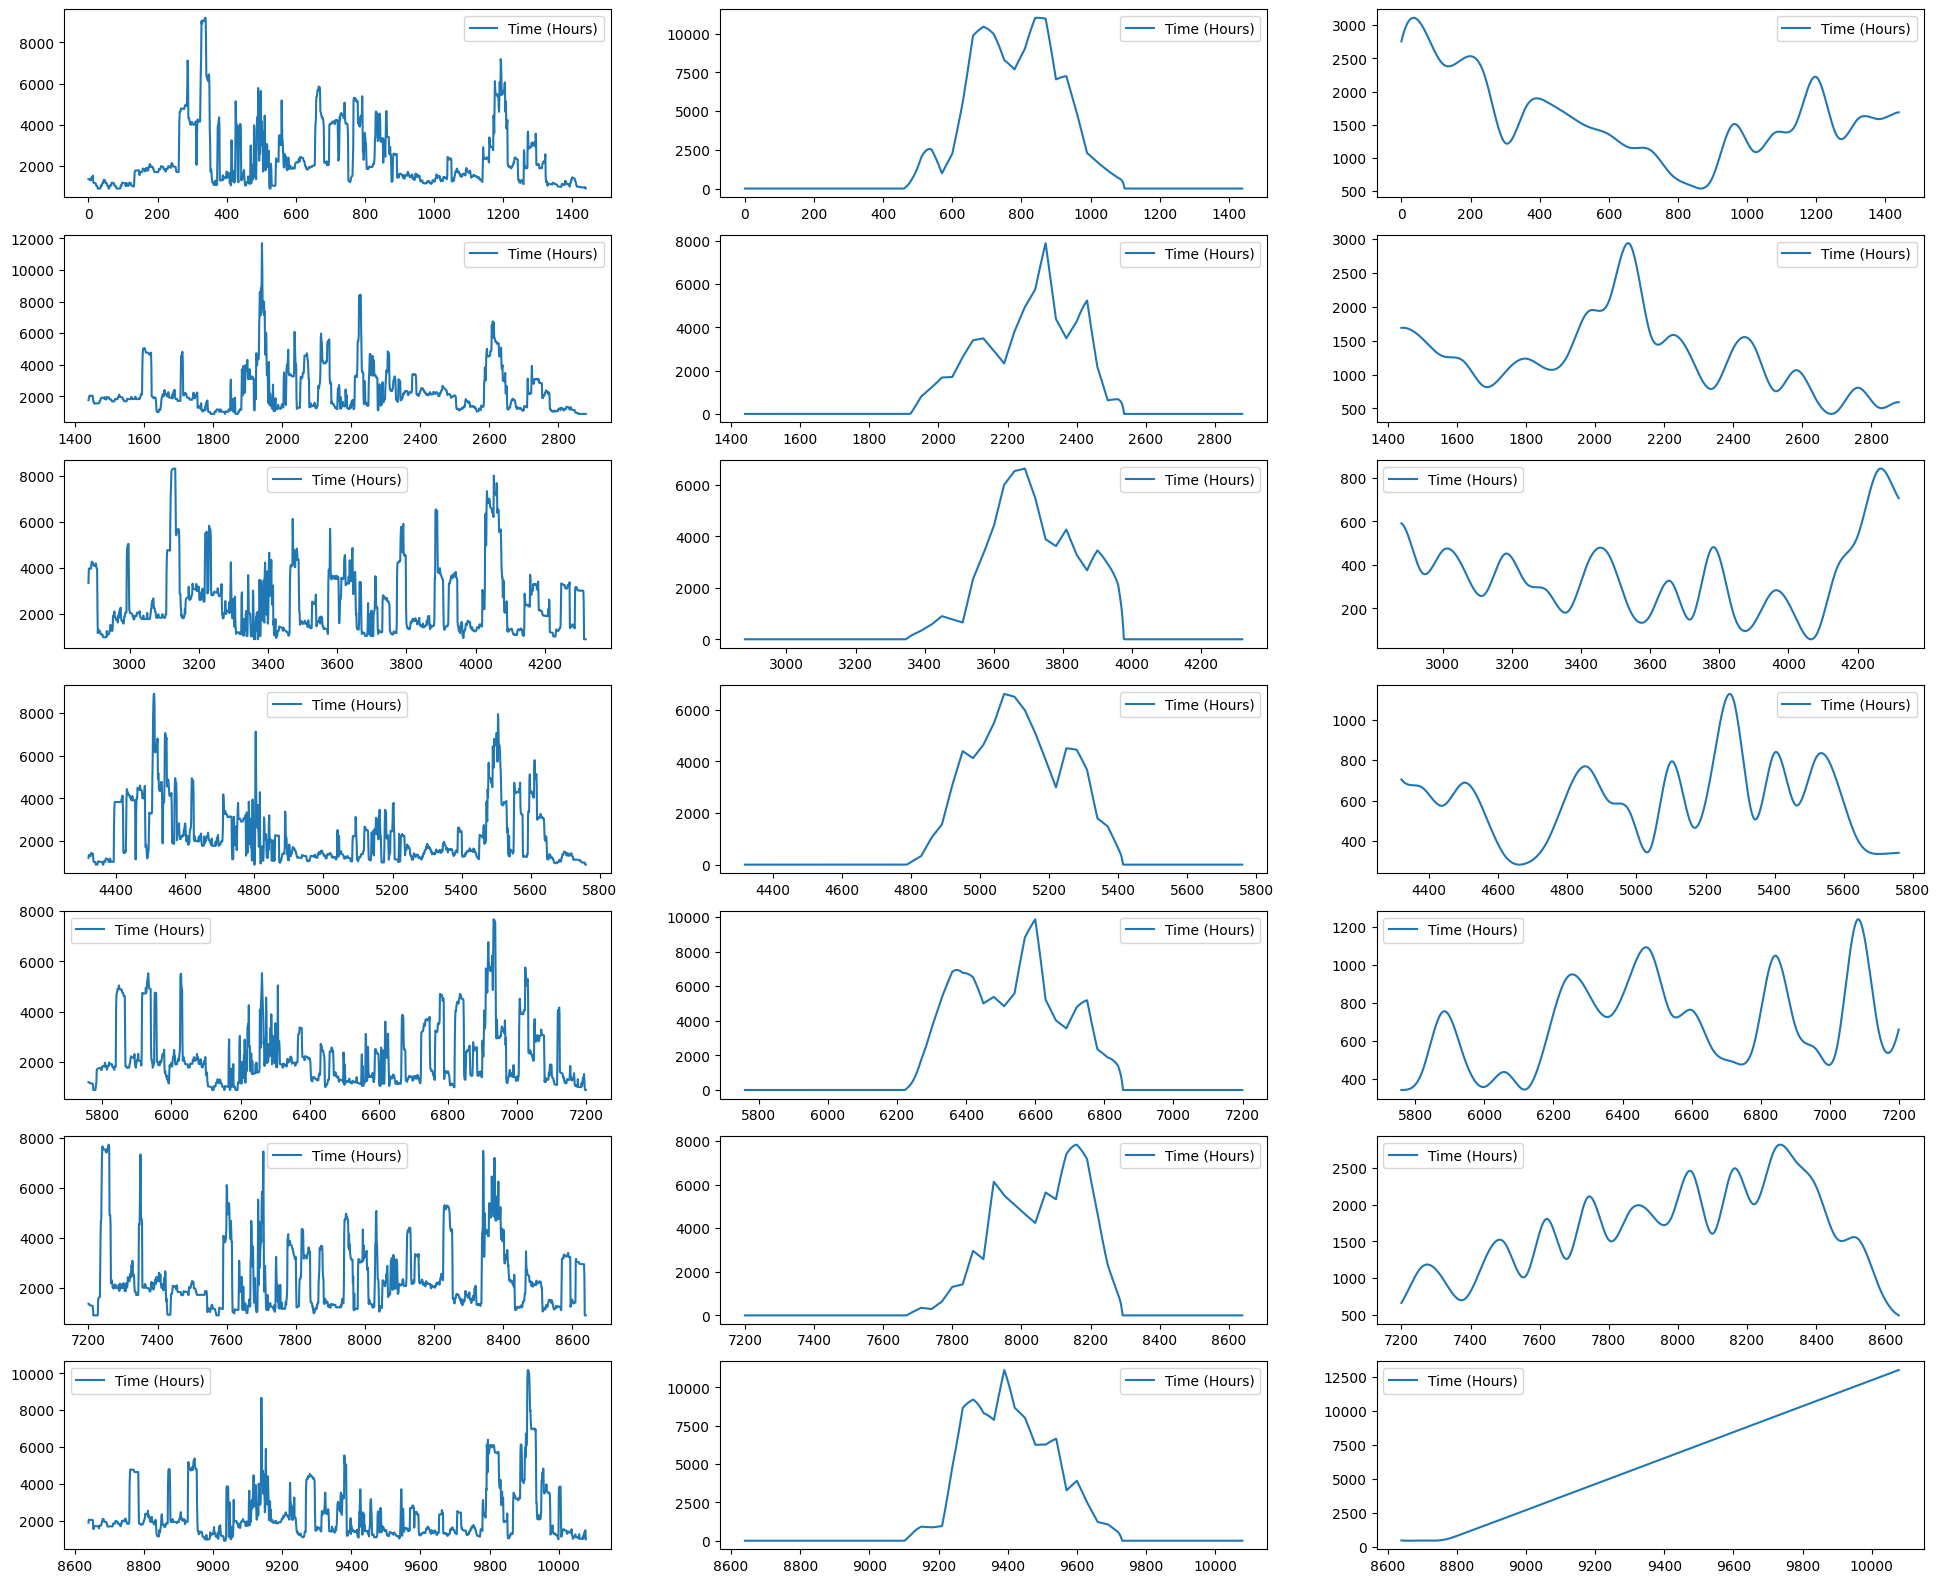

In [73]:
# Plot results

fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(24, 20))

for i in range(7):
    axs[i, 0].plot(community_df[i*24*60:(i+1)*24*60]["Demand"])
    axs[i, 0].legend(['Time (Hours)', 'Power (W)'])
    
    axs[i, 1].plot(community_df[i*24*60:(i+1)*24*60]["PV_Production"])
    axs[i, 1].legend(['Time (Hours)', 'Power (W)'])
    
    axs[i, 2].plot(community_df[i*24*60:(i+1)*24*60]["Wind_Production"])
    axs[i, 2].legend(['Time (Hours)', 'Power (W)'])


plt.show()